In [13]:
import pandas as pd
import numpy as np

print('numpy version - ',np.__version__)
print('pandas version -',pd.__version__)
# ml
import sklearn
from sklearn.datasets import load_iris,load_breast_cancer

print('sklearn version - ',sklearn.__version__)


from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score,\
cross_validate,GridSearchCV,train_test_split 
from sklearn.tree            import DecisionTreeClassifier 
from sklearn.metrics         import accuracy_score 

numpy version -  1.20.3
pandas version - 1.3.4
sklearn version -  0.24.2


### 학습목표(데이터 전처리)
- 결측치 처리(missingno), 이상치 처리(박스플롯)
- 데이터 인코딩(ml 문자열의 값을 입력값으로 허용하지 않는다)-> 숫자형 변환
- 인코딩 방법(레이블 인코딩, 원-핫 인코딩)
- 데이터 인코딩 회귀 사용 X, 트리계열의 알고리즘에 적용할 경우 최적화 된다.
- 트리계열의 알고리즘 중에 성능이 떨어지는 단점이 있을 수 있다. - 숫자의 특성이 반영되기 때문에

- feature scaling -> 정규화, 표준화
- 정규화(0과 1 사이의 값으로 변환 - MinMaxScalar)
- 표준화(정규분포를 따르는 형식으로 병균이 0이고 분산이 1인 가우시안 분포로 변환 -> StandardScaler)

- feature important

In [14]:
iris = load_iris()
print('type -',type(iris))
print('keys - ',iris.keys(), type(iris.keys()))

type - <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']) <class 'dict_keys'>


In [15]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,
                                                   iris.target,
                                                   test_size = 0.2,
                                                   random_state= 200)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [17]:
print('불순도(impurity)-해당 범주안에 서로 다른 데이터가 얼마나 섞여있는지-')
print('엔트로피(entropy)-불순도를 수치적으로 나타낸 척도')
print('지니(gini)-불순도를 수치적으로 나타낸 척도')

gscv_dtc_model = DecisionTreeClassifier()
param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3],#숫자는 의미 없음(깊이가 깊어지면 과적합 될 수 있음)
    'min_samples_split' : [2,3],# 나눌수 있는 샘플 수
    'splitter' : ['random','best'] # 어떻게 나눌지 
}


불순도(impurity)-해당 범주안에 서로 다른 데이터가 얼마나 섞여있는지-
엔트로피(entropy)-불순도를 수치적으로 나타낸 척도
지니(gini)-불순도를 수치적으로 나타낸 척도


In [18]:
print('GridSearchCV를 이용한 최적의 모델을 만드는 방법 - ')
grid_tree = GridSearchCV(gscv_dtc_model,
                        param_grid = param,
                        cv = 5,
                        refit = True)# 내부적으로 베스트 파람찾으면 
#######################################그걸로 재학습

GridSearchCV를 이용한 최적의 모델을 만드는 방법 - 


In [19]:
grid_tree.fit(x_train,y_train)
grid_tree.cv_results_

{'mean_fit_time': array([1.00159645e-03, 7.98559189e-04, 3.43275070e-04, 3.21102142e-04,
        0.00000000e+00, 4.28104401e-04, 6.13689423e-05, 0.00000000e+00,
        4.23097610e-04, 1.99794769e-04, 6.04581833e-04, 7.94839859e-04,
        4.48417664e-04, 9.72414017e-04, 9.98258591e-04, 8.82720947e-04,
        3.94535065e-04, 5.98669052e-04, 0.00000000e+00, 3.99255753e-04,
        2.00223923e-04, 5.98335266e-04, 2.56776810e-04, 3.99017334e-04]),
 'std_fit_time': array([2.03525081e-04, 4.00882974e-04, 6.86550140e-04, 4.12022580e-04,
        0.00000000e+00, 5.26411671e-04, 1.22737885e-04, 0.00000000e+00,
        5.19605703e-04, 3.99589539e-04, 4.93730291e-04, 3.97508095e-04,
        4.53639711e-04, 6.03973321e-05, 4.51109122e-06, 2.54441693e-04,
        4.83254579e-04, 4.88815025e-04, 0.00000000e+00, 4.88986581e-04,
        4.00447845e-04, 4.88632153e-04, 3.85929090e-04, 4.88697248e-04]),
 'mean_score_time': array([0.00035415, 0.        , 0.00085311, 0.00067616, 0.00099792,
        0.00

In [20]:
score_frm = pd.DataFrame(grid_tree.cv_results_)
score_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001002,0.000204,0.000354,3.684401e-04,gini,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.583333,0.666667,0.666667,0.666667,0.583333,0.633333,0.040825,23
1,0.000799,0.000401,0.000000,0.000000e+00,gini,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.666667,0.625000,0.658333,0.016667,17
2,0.000343,0.000687,0.000853,2.889873e-04,gini,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.666667,0.583333,0.650000,0.033333,22
3,0.000321,0.000412,0.000676,4.121010e-04,gini,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.666667,0.666667,0.666667,0.666667,0.625000,0.658333,0.016667,17
4,0.000000,0.000000,0.000998,9.368364e-07,gini,2,2,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.791667,0.791667,1.000000,0.916667,0.666667,0.833333,0.114867,15
5,0.000428,0.000526,0.000200,3.995895e-04,gini,2,2,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,2
6,0.000061,0.000123,0.000000,0.000000e+00,gini,2,3,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.791667,0.833333,1.000000,0.916667,0.666667,0.841667,0.113039,14
7,0.000000,0.000000,0.000000,0.000000e+00,gini,2,3,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.916667,0.916667,0.069722,2
8,0.000423,0.000520,0.000000,0.000000e+00,gini,3,2,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916667,0.916667,0.916667,0.833333,0.833333,0.883333,0.040825,10
9,0.000200,0.000400,0.000339,4.260959e-04,gini,3,2,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.916667,0.958333,1.000000,0.791667,0.875000,0.908333,0.071686,6


In [21]:
score_frm[['params','rank_test_score']]

,params,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",23
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",17
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",22
3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",17
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",15
5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",2
6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",14
7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",2
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",10
9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",6


In [22]:
print('최적의 파라미터 확인 - ')
print(grid_tree.best_params_)
print()
print('최적의 파라미터의 정확도 - ')
print(grid_tree.best_score_)

최적의 파라미터 확인 - 
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3, 'splitter': 'random'}

최적의 파라미터의 정확도 - 
0.9583333333333333


In [23]:
estimator = grid_tree.best_estimator_ #estimatr:학습기
y_pred = estimator.predict(x_test) # 재평가
print('answer - \n',y_test)
print()
print('guess - \n', y_pred)
print()
print('acc  - \n', accuracy_score(y_test, y_pred))

answer - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

guess - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 2 1 1]

acc  - 
 0.8666666666666667


In [24]:
gscv_dtc_best_model = DecisionTreeClassifier(criterion='entropy', 
                                        max_depth=3, 
                                        min_samples_split=2, 
                                        splitter = 'random',
                                        )
gscv_dtc_best_model.fit(x_train,y_train)
y_pred = gscv_dtc_best_model.predict(x_test)
print('answer - \n',y_test)
print()
print('guess - \n', y_pred)
print()
print('acc  - \n', accuracy_score(y_test, y_pred))



answer - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

guess - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

acc  - 
 1.0


In [25]:
import seaborn as sns

In [26]:
print('feature importance - ')
print(estimator.feature_importances_)

feature importance - 
[0. 0. 1. 0.]


In [27]:
for name, value in zip(iris.feature_names , estimator.feature_importances_):
    print(name, '\t', value)# 전체합은 1(1에 가까우면 가까울수록 영향도 큼)

sepal length (cm) 	 0.0
sepal width (cm) 	 0.0
petal length (cm) 	 1.0
petal width (cm) 	 0.0


<AxesSubplot:>

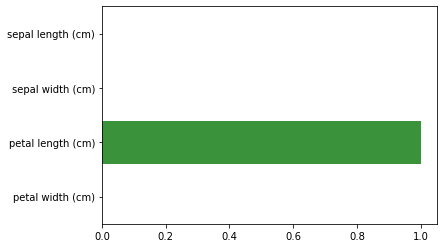

In [28]:
sns.barplot(x = estimator.feature_importances_, y = iris.feature_names)

### breast_cancer 데이터를 이용한 GridSearchCV[실습]

In [29]:
cancer = load_breast_cancer()
print('type - ',type(load_breast_cancer))
print('keys - ',cancer.keys())

type -  <class 'function'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [30]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [31]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [33]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [34]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [35]:
print('GridSearchCV - DecisionTreeClass -')
print('학습, 테스트 7:3 -')
print('best estimator - ')
print('학습, 예측 - ')
print('feature 중요도를 시각화 - ')

GridSearchCV - DecisionTreeClass -
학습, 테스트 7:3 -
best estimator - 
학습, 예측 - 
feature 중요도를 시각화 - 


In [36]:
print('학습, 테스트 7:3 -')
x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   test_size = 0.3,
                                                   random_state= 200)

학습, 테스트 7:3 -


In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [38]:
print('best estimator - ')
cancer_dtc_model = DecisionTreeClassifier()
param = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [1,2,3,4,5], #최대로 가는 깊이(의미없음?)
    'min_samples_split' : [2,3,4],# 나눌수 있는 샘플 수
    'splitter' : ['random','best'] # 어떻게 나눌지 
}

best estimator - 


In [39]:
print('GridSearchCV를 이용한 최적의 모델을 만드는 방법 - ')
grid_cancer = GridSearchCV(cancer_dtc_model,
                        param_grid = param,
                        cv = 5,
                        refit = True)

GridSearchCV를 이용한 최적의 모델을 만드는 방법 - 


In [40]:
grid_cancer.fit(x_train,y_train)
grid_cancer.cv_results_

{'mean_fit_time': array([0.00069776, 0.00168362, 0.00079689, 0.00162544, 0.00055785,
        0.00159917, 0.00058103, 0.00242133, 0.00068197, 0.00199614,
        0.00122662, 0.001788  , 0.00076451, 0.00219555, 0.0007987 ,
        0.0025918 , 0.0009973 , 0.00232186, 0.00059824, 0.00299206,
        0.00081768, 0.00279288, 0.00079708, 0.00276937, 0.00011597,
        0.00279636, 0.00039902, 0.00279117, 0.00080719, 0.00319405,
        0.        , 0.00159793, 0.0008215 , 0.00189638, 0.        ,
        0.00199647, 0.00019932, 0.00233107, 0.00099721, 0.00279522,
        0.0009973 , 0.00238576, 0.00080004, 0.00404325, 0.00059824,
        0.00379   , 0.00079832, 0.0033905 , 0.00099854, 0.00359139,
        0.00059719, 0.00378928, 0.00053077, 0.00359211, 0.00059848,
        0.00379195, 0.00059767, 0.00332794, 0.00079784, 0.00402837]),
 'std_fit_time': array([7.76172021e-04, 4.02212118e-04, 4.27157918e-04, 4.55516265e-04,
        4.61710131e-04, 4.91172447e-04, 4.77270025e-04, 4.92212403e-04,
     

In [41]:
print('최적의 파라미터 확인 - ')
print(grid_cancer.best_params_)
print()
print('최적의 파라미터의 정확도 - ')
print(grid_cancer.best_score_)

최적의 파라미터 확인 - 
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3, 'splitter': 'best'}

최적의 파라미터의 정확도 - 
0.9472784810126582


In [42]:
print('학습, 예측 - ')
estimator = grid_cancer.best_estimator_ #estimatr:학습기
y_pred = estimator.predict(x_test) # 재학습
print('answer - \n',y_test)
print()
print('guess - \n', y_pred)
print()
print('acc  - \n', accuracy_score(y_test, y_pred))

학습, 예측 - 
answer - 
 [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0]

guess - 
 [1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0]

acc  - 
 0.9415204678362573


feature 중요도를 시각화 - 
mean radius 	 0.0

mean texture 	 0.0

mean perimeter 	 0.0

mean area 	 0.0

mean smoothness 	 0.0

mean compactness 	 0.0

mean concavity 	 0.0

mean concave points 	 0.6204430543381334

mean symmetry 	 0.0

mean fractal dimension 	 0.0

radius error 	 0.0

texture error 	 0.0

perimeter error 	 0.0

area error 	 0.03784680465101681

smoothness error 	 0.0

compactness error 	 0.0

concavity error 	 0.0

concave points error 	 0.022578949346429823

symmetry error 	 0.0

fractal dimension error 	 0.0

worst radius 	 0.024491526558006224

worst texture 	 0.04029325983005301

worst perimeter 	 0.20887748681312093

worst area 	 0.0

worst smoothness 	 0.019307508880202946

worst compactness 	 0.0

worst concavity 	 0.0

worst concave points 	 0.02616140958303695

worst symmetry 	 0.0

worst fractal dimension 	 0.0



<AxesSubplot:>

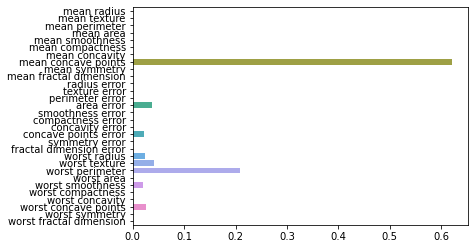

In [45]:
print('feature 중요도를 시각화 - ')
for name, value in zip(cancer.feature_names , estimator.feature_importances_):
    print(name, '\t', value)
    print()
    
sns.barplot(x = estimator.feature_importances_, y = cancer.feature_names)

## 레이블 인코딩

In [43]:
import pandas as pd
import numpy as np

print('numpy version - ',np.__version__)
print('pandas version -',pd.__version__)
# ml
import sklearn
from sklearn.datasets import load_iris,load_breast_cancer

print('sklearn version - ',sklearn.__version__)


from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score,\
cross_validate,GridSearchCV 
from sklearn.tree            import DecisionTreeClassifier 
from sklearn.metrics         import accuracy_score 
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder,StandardScaler,MinMaxScaler

numpy version -  1.20.3
pandas version - 1.3.4
sklearn version -  0.24.2


In [44]:
# 인코딩
label_items = ['abvxdefj','advidn','abc','salsalsal','낫또','낫또']
encoder = LabelEncoder()
labels = encoder.fit(label_items).transform(label_items)
print('labels - ',labels) # 만들어진 숫자 의미 없음 내부적 알고리즘
print('encoding class - ',encoder.classes_)
print('decoding - ',encoder.inverse_transform(labels))

labels -  [1 2 0 3 4 4]
encoding class -  ['abc' 'abvxdefj' 'advidn' 'salsalsal' '낫또']
decoding -  ['abvxdefj' 'advidn' 'abc' 'salsalsal' '낫또' '낫또']


## 원-핫 인코딩

In [45]:
label_items = ['abvxdefj','advidn','abc','salsalsal','낫또','낫또']
encoder = LabelEncoder()
digit_labels = encoder.fit_transform(label_items)

print('type - ',type(digit_labels))#[1 2 3 4]-> ndarray type
print('data - ',digit_labels,digit_labels.shape)

print('차원변환 - reshape')
digit_labels = digit_labels.reshape(-1,1)#-1:행의 개수 임의적, 1:열의 개수 1개
print('shape - ',digit_labels.shape)
print('data -\n ',digit_labels)
print()

# 1 레이블 인코딩 -> 2 차원변화 -> 원핫인코딩
print('One-Hot Encoding - ')
one_hot_encoder = OneHotEncoder()
one_hot_encoder_frm=one_hot_encoder.fit_transform(digit_labels)
print()
print('shape - ',one_hot_encoder_frm.shape)

type -  <class 'numpy.ndarray'>
data -  [1 2 0 3 4 4] (6,)
차원변환 - reshape
shape -  (6, 1)
data -
  [[1]
 [2]
 [0]
 [3]
 [4]
 [4]]

One-Hot Encoding - 

shape -  (6, 5)


In [46]:
print(one_hot_encoder_frm)

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 4)	1.0


In [47]:
print('data - \n',one_hot_encoder_frm.toarray())

data - 
 [[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [48]:
encoder_frm = pd.DataFrame({
    'label_items' : ['abvxdefj','advidn','abc','salsalsal','낫또','낫또']
})
encoder_frm

pd.get_dummies(encoder_frm)

,label_items_abc,label_items_abvxdefj,label_items_advidn,label_items_salsalsal,label_items_낫또
0,0,1,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1
5,0,0,0,0,1


## 결측값 처리
- 결측값을 시각화 시켜주는 패키지 인스톨이 필요
- conda install -c conda-forge/label/cf202003 missingno

In [49]:
from io import StringIO
# 캐글
csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")# 이것을 읽어오면 데이터프레임이 된다.

tmp_frm = pd.read_csv(csv_data)
tmp_frm

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [50]:
tmp_frm.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

In [56]:
sum([False,True,True,False,False]) # -> sum 은 불형데이터(True)를 센다.

2

In [51]:
import missingno as msno

<AxesSubplot:>

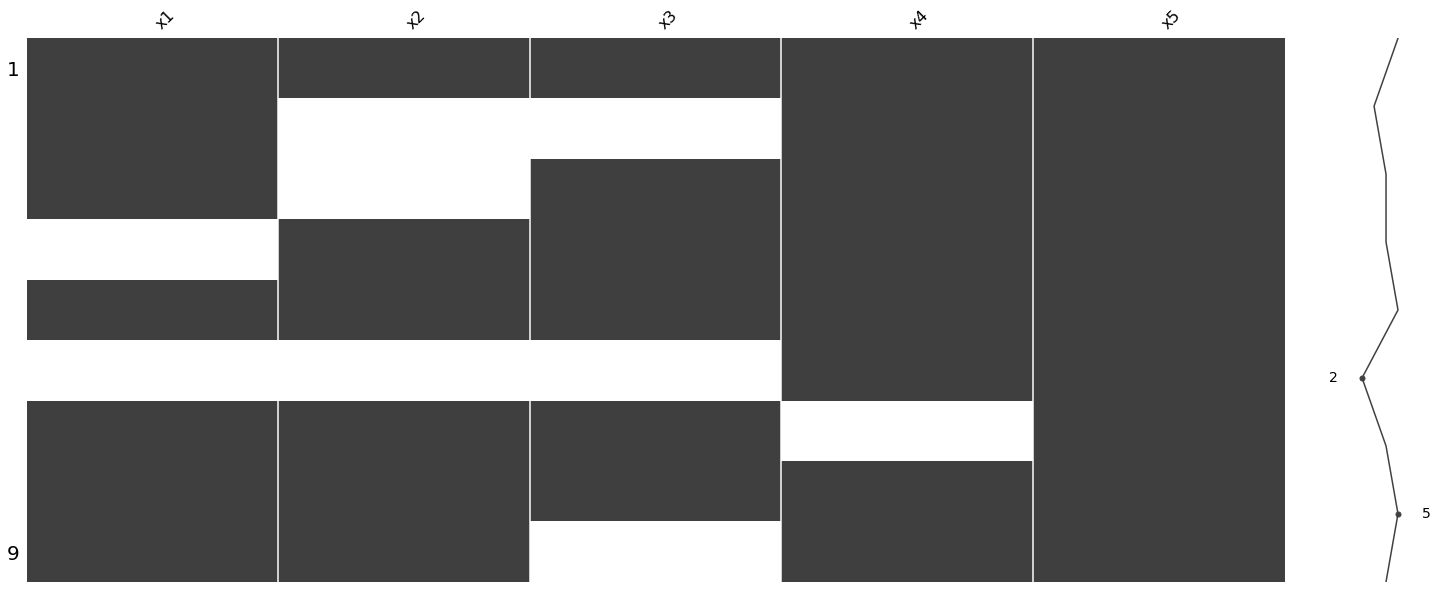

In [52]:
msno.matrix(tmp_frm)

<AxesSubplot:>

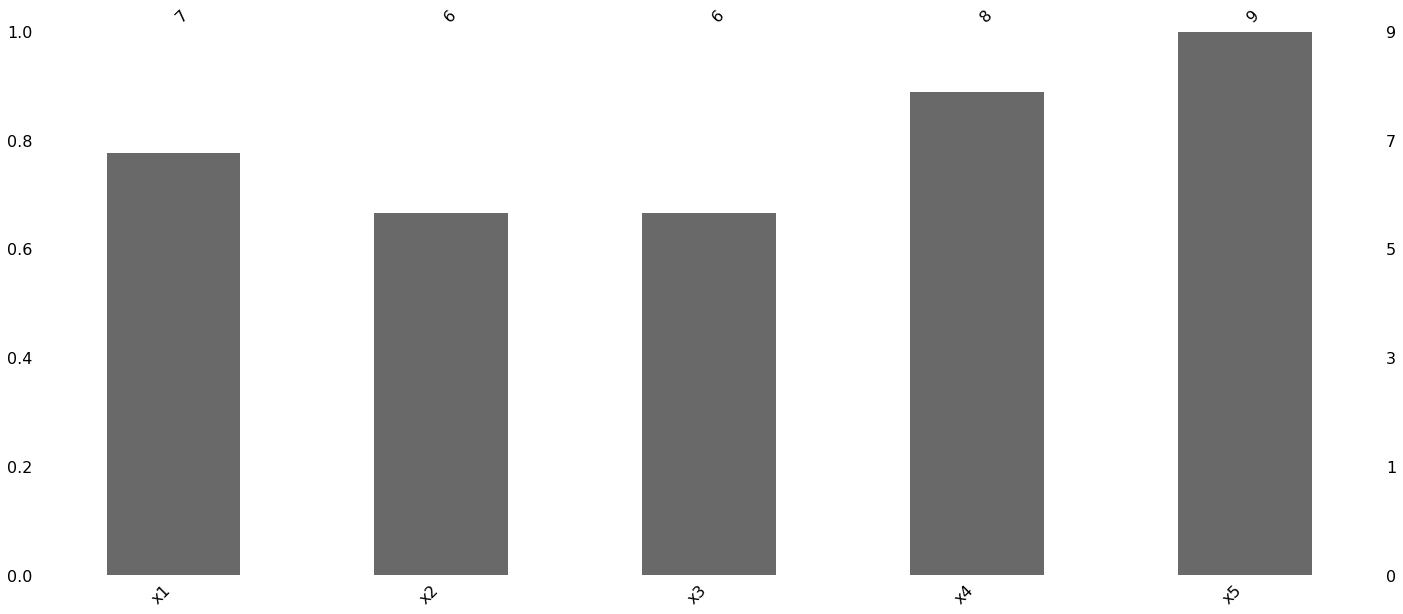

In [53]:
msno.bar(tmp_frm)

In [54]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [62]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [63]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<AxesSubplot:>

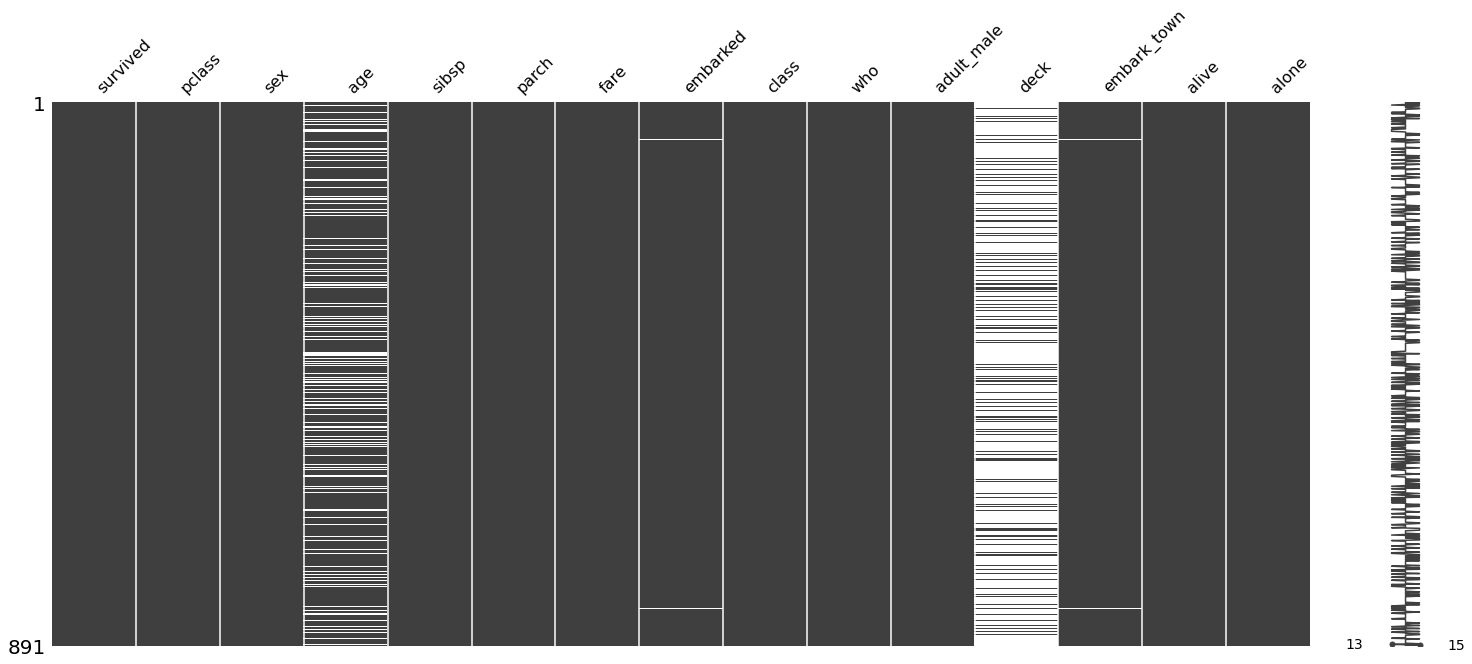

In [64]:
msno.matrix(titanic)

<AxesSubplot:>

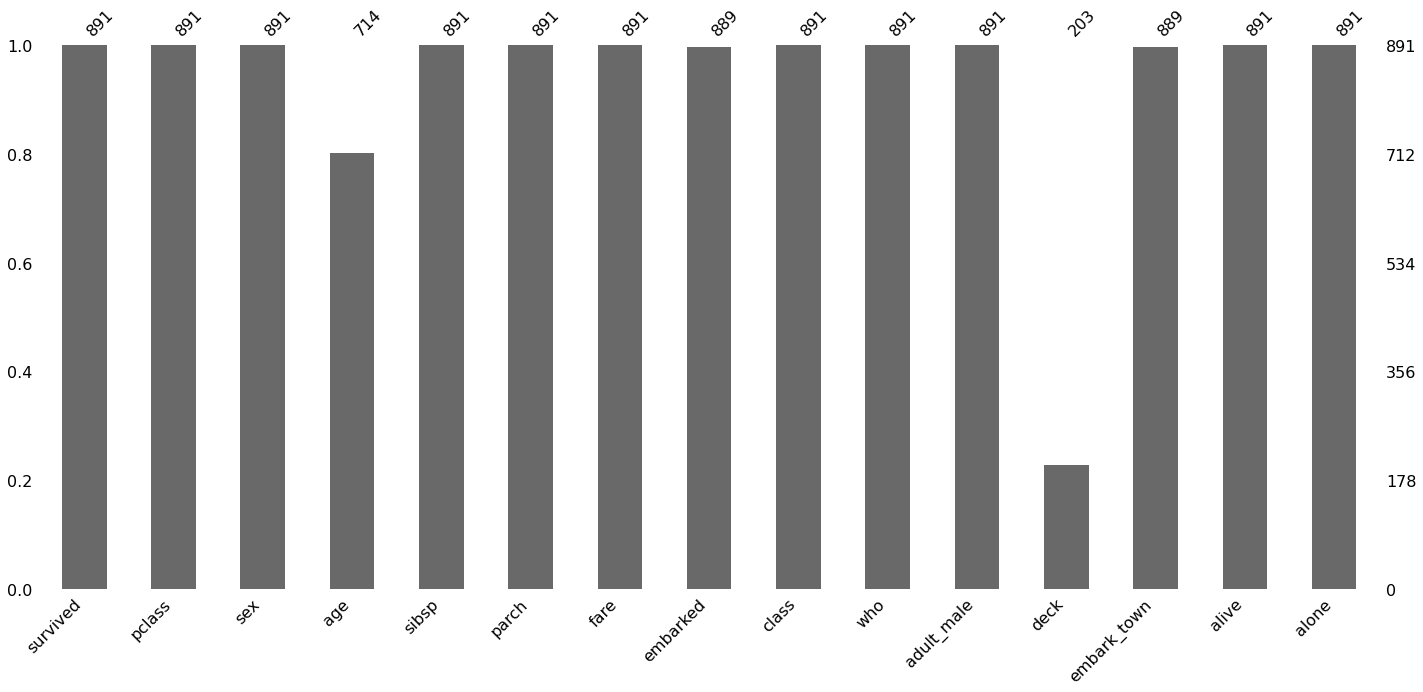

In [65]:
msno.bar(titanic)

In [178]:
tmp_frm

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [66]:
from sklearn.impute import SimpleImputer

In [69]:
print('결측값을 드랍하지 않고 대체값(평균, 중앙, 최빈)으로 변경한다면 - ')
print('fit_transform')
print()
imputer = SimpleImputer(strategy='most_frequent')#최빈값으로 프레임전체 적용

clean_frm = pd.DataFrame(imputer.fit_transform(tmp_frm),
                        columns= tmp_frm.columns)
clean_frm

결측값을 드랍하지 않고 대체값(평균, 중앙, 최빈)으로 변경한다면 - 
fit_transform



,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,0.1,1.0,2019-01-02,B
2,3.0,0.1,3.0,2019-01-03,C
3,1.0,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,1.0,0.1,1.0,2019-01-06,C
6,7.0,0.7,7.0,2019-01-01,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,1.0,2019-01-09,C


titaninc age - mean 대체한다면 - 


<AxesSubplot:>

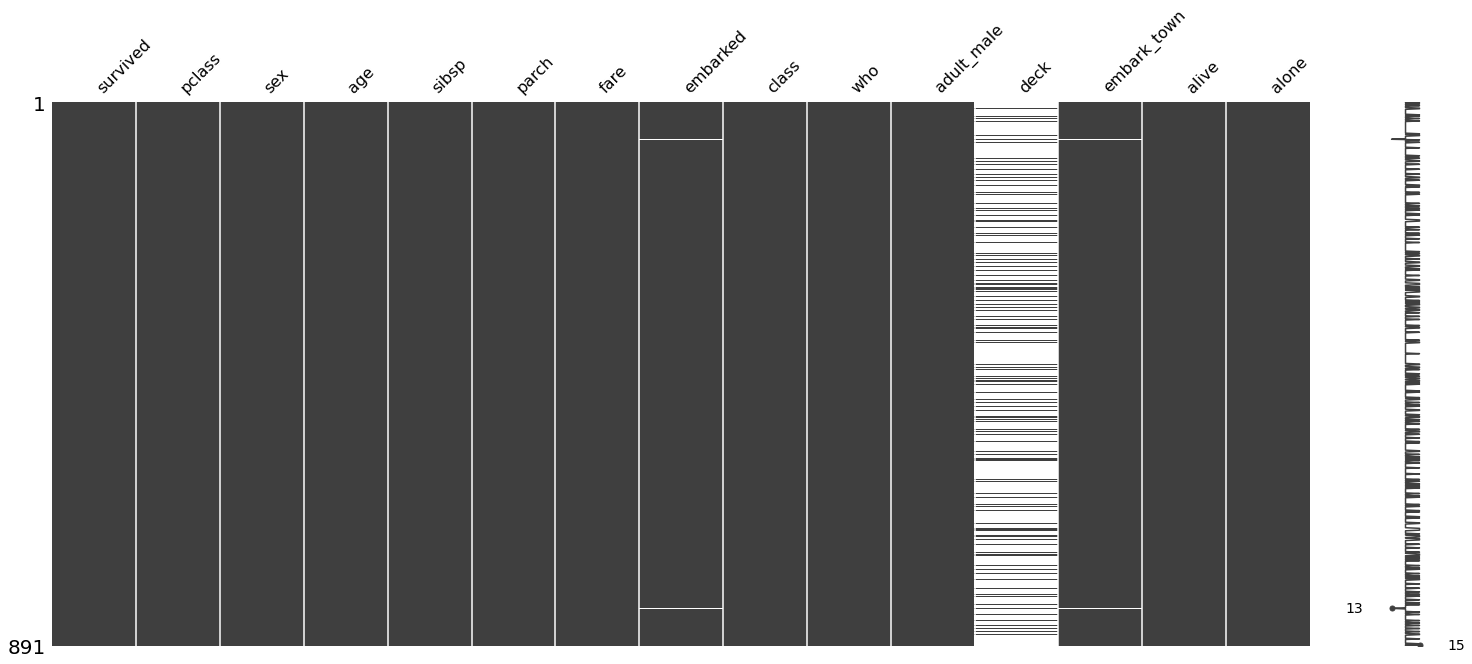

In [70]:
print('titaninc age - mean 대체한다면 - ')
imputer = SimpleImputer(strategy='mean')#최빈값으로 프레임전체 적용

titanic['age'] = imputer.fit_transform(titanic[['age']])#프레임적용해야


msno.matrix(titanic)

<AxesSubplot:>

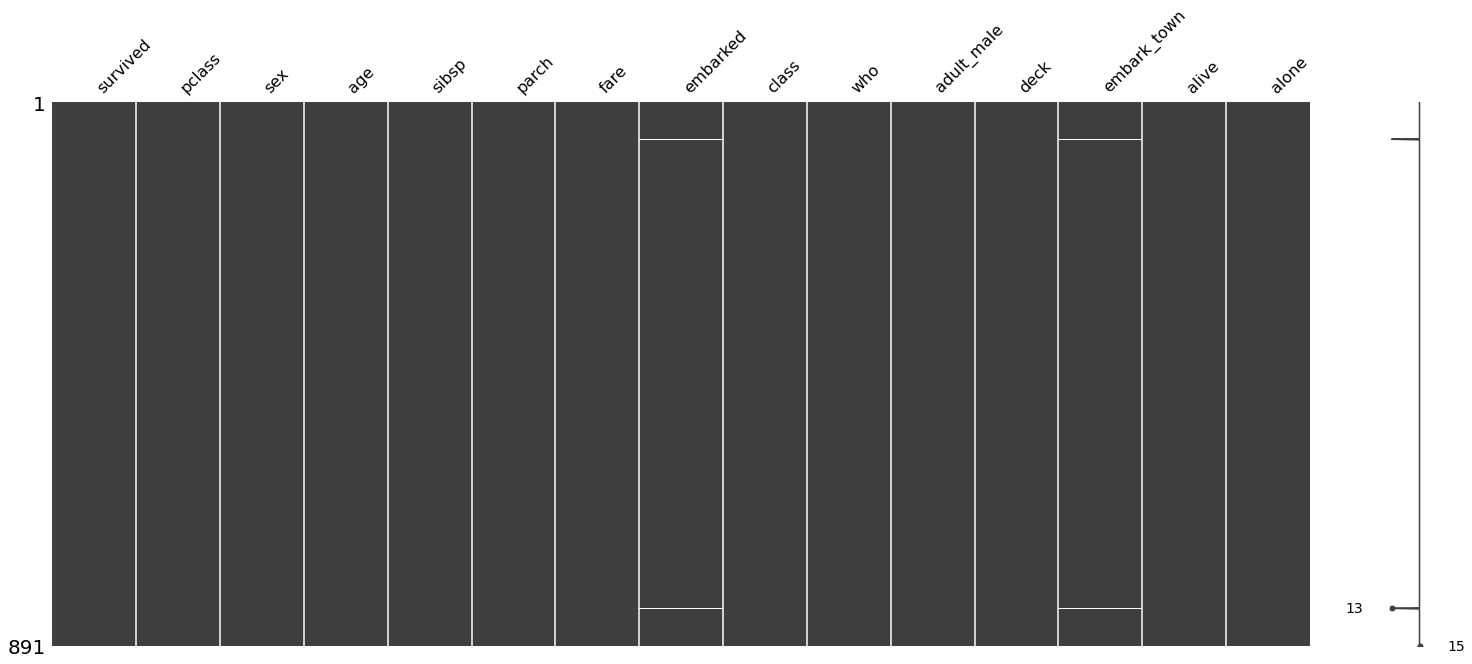

In [71]:
titanic['deck'] = titanic['deck'].fillna('D')
msno.matrix(titanic)

<AxesSubplot:>

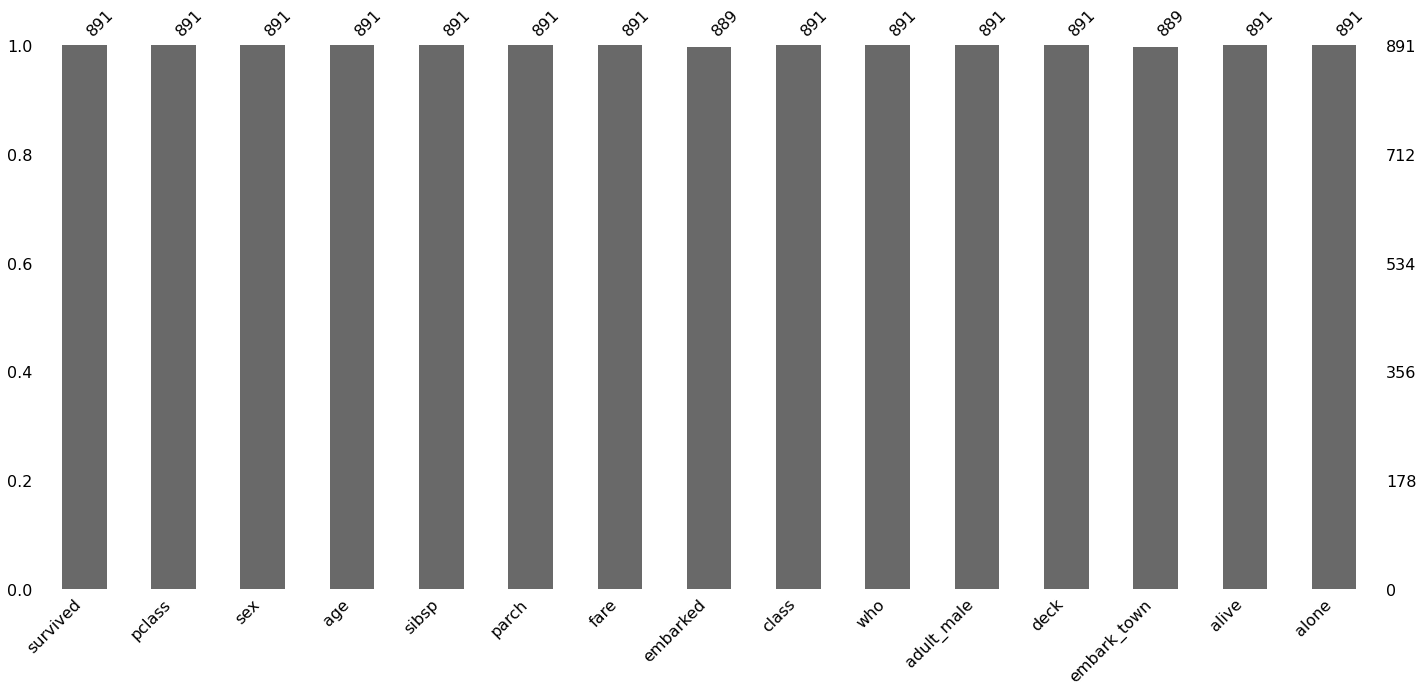

In [72]:
msno.bar(titanic)

### feature scaling

In [202]:
# 유닛이 다를 경우 스케일링을 사용
iris_frm = pd.DataFrame(data    = iris.data,
                       columns  = iris.feature_names)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [204]:
iris_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [205]:
iris_frm.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [209]:
print('표준화 - StandarScaler - ')

s_scaler = StandardScaler()
s_iris_frm = s_scaler.fit_transform(iris_frm)
s_iris_frm = pd.DataFrame(s_iris_frm, columns = iris.feature_names)

s_iris_frm

표준화 - StandarScaler - 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [210]:
print('정규화 - MinMaxScaler - ')

m_scaler = MinMaxScaler()
m_iris_frm = m_scaler.fit_transform(iris_frm)
m_iris_frm = pd.DataFrame(m_iris_frm, columns = iris.feature_names)

m_iris_frm
# target 은 정규화나 표준화를 시키지 않음 (분류)

정규화 - MinMaxScaler - 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


### 스케일링시 주의할점!!!(중요)

In [265]:
print('예제를 통한 문제점 파악!!')
print()
print()
x_train = np.arange(0,11).reshape(-1,1)
print('train - \n', x_train)
print('train shape - ',x_train.shape)
print(type(x_train))
x_test = np.arange(0,6).reshape(-1,1)
print('test - \n', x_test)
print('test shape - ',x_test.shape)

예제를 통한 문제점 파악!!


train - 
 [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
train shape -  (11, 1)
<class 'numpy.ndarray'>
test - 
 [[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
test shape -  (6, 1)


In [214]:
# 문제점 1
print('학습데이터의 정규화 - ')
train_scaler = MinMaxScaler()
m_train_scaler = train_scaler.fit_transform(x_train)
print()
print('원본데이터 - ',x_train.reshape(-1))
print()
print('정규화 데이터 - ',m_train_scaler.reshape(-1))

학습데이터의 정규화 - 

원본데이터 -  [ 0  1  2  3  4  5  6  7  8  9 10]

정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [215]:
print('테스트데이터의 정규화 - ')
test_scaler = MinMaxScaler()
m_test_scaler = test_scaler.fit_transform(x_test)
print()
print('원본데이터 - ',x_test.reshape(-1))
print()
print('정규화 데이터 - ',m_test_scaler.reshape(-1))
# 문제점1:테스트 데이터와 트레인 데이터와의 정규화 기준이 달라졌다!!

학습데이터의 정규화 - 

원본데이터 -  [0 1 2 3 4 5]

정규화 데이터 -  [0.  0.2 0.4 0.6 0.8 1. ]


### 스케일링 문제점 해결: 학습데이터 기준으로 테스트데이터 스케일링 하기

In [218]:
print('학습데이터의 정규화 - ')
scaler = MinMaxScaler()
scaler.fit(x_train) # 학습데이터 기준으로 fit 되었다.
m_train_scaler = scaler.transform(x_train)
print()
print('원본데이터 - ',x_train.reshape(-1))
print()
print('정규화 데이터 - ',m_train_scaler.reshape(-1))
print()
print()
print()
print('테스트데이터의 정규화 - ')
m_test_scaler = scaler.transform(x_test)# 위에서 이미 fit이 진행되어있어
################################################fit 하지않음
print()
print('원본데이터 - ',x_test.reshape(-1))
print()
print('정규화 데이터 - ',m_test_scaler.reshape(-1))

학습데이터의 정규화 - 

원본데이터 -  [ 0  1  2  3  4  5  6  7  8  9 10]

정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]



테스트데이터의 정규화 - 

원본데이터 -  [0 1 2 3 4 5]

정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5]


In [ ]:
# 스플릿 전에 정규화를 하지 않고 스플릿 후에 정규화 하는 이유
# 테스트 이후차이가 많이 남

#### 스케일링 [실습]
- 스케일링 전 모델 학습
- 스케일링 후 모델 학습(정규화, 표준화)

In [225]:
sample_frm = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv' , 
                                   header  = None , 
                                   usecols = [0, 2, 13])
sample_frm.columns = ['target','x','y']
sample_frm

,target,x,y
0,1,1.71,1065
1,1,1.78,1050
2,1,2.36,1185
3,1,1.95,1480
4,1,2.59,735
...,...,...,...
173,3,5.65,740
174,3,3.91,750
175,3,4.28,835
176,3,2.59,840


In [452]:
# 스케일링 전 모듈 학습
sample_data1 = pd.array(sample_frm.x)
sample_data2 = pd.array(sample_frm.y)
sample_data = []
for i,j in zip(sample_data1,sample_data2):
    sample_data.append([i,j])

    
x_train, x_test, y_train, y_test = train_test_split(sample_frm.loc[:,['x','y']],
                                                   sample_frm.target,
                                                   test_size = 0.2,
                                                   random_state= 200)

sample_frm_model = DecisionTreeClassifier()
sample_frm_model.fit(x_train, y_train)
print(type(sample_frm_model))
y_pred = sample_frm_model.predict(x_test)

print(type(x_test))
print('acc - ',accuracy_score(y_test,y_pred))
# 값의 큰차이는 없음(정규화와)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'pandas.core.frame.DataFrame'>
acc -  0.7222222222222222


In [324]:
# 스케일링 후 모델 학습(표준화)

sample_data1 = pd.array(sample_frm.x)
sample_data2 = pd.array(sample_frm.y)
sample_data = []
for i,j in zip(sample_data1,sample_data2):
    sample_data.append([i,j])

    
x_train, x_test, y_train, y_test = train_test_split(sample_data,
                                                   sample_frm.target,
                                                   test_size = 0.2,
                                                   random_state= 10)
# 표준화
scaler = StandardScaler()
scaler.fit(x_train)

m_train_scaler = scaler.transform(x_train)
m_test_scaler = scaler.transform(x_test)

# 학습
sample_frm_model = DecisionTreeClassifier()
sample_frm_model.fit(m_train_scaler, y_train)
y_pred = sample_frm_model.predict(m_test_scaler)

print('acc - ',accuracy_score(y_test,y_pred))


acc -  0.7777777777777778


In [472]:
# 스케일링 후 모델 학습(정규화)
x_train, x_test, y_train, y_test = train_test_split(sample_frm.loc[:,['x','y']],
                                                   sample_frm.target,
                                                   test_size = 0.2,
                                                   random_state= 15)
# sample_frm.lic[:,['x','y']] 해도됨
# 정규화
scaler =MinMaxScaler()
scaler.fit(x_train)

m_train_scaler = scaler.transform(x_train)
m_test_scaler = scaler.transform(x_test)

sample_frm_model = DecisionTreeClassifier()
sample_frm_model.fit(m_train_scaler, y_train)
y_pred = sample_frm_model.predict(m_test_scaler)

print('acc - ',accuracy_score(y_test,y_pred))


acc -  0.8333333333333334


In [442]:
x_train, x_test, y_train, y_test = train_test_split(sample_frm.loc[ : ,['x','y']],
                                                   sample_frm.target,
                                                   test_size = 0.2,
                                                   random_state= 100)
# 정규화
scaler = StandardScaler()
scaler.fit(x_train)

m_train_scaler = scaler.transform(x_train)
m_test_scaler = scaler.transform(x_test)

# 학습
sample_frm_model = DecisionTreeClassifier()
sample_frm_model.fit(m_train_scaler, y_train)
y_pred = sample_frm_model.predict(m_test_scaler)

print('acc - ',accuracy_score(y_test,y_pred))

acc -  0.7777777777777778


In [485]:
x_train, x_test, y_train, y_test = train_test_split(sample_frm.loc[ : ,['x','y']],
                                                   sample_frm.target,
                                                   test_size = 0.2,
                                                   random_state= 105)

sample_frm_model = DecisionTreeClassifier()
sample_frm_model.fit(x_train, y_train)
print(type(sample_frm_model))
y_pred = sample_frm_model.predict(x_test)

print(type(x_test))
print('acc - ',accuracy_score(y_test,y_pred))
acc = []
print(acc.append(accuracy_score(y_test,y_pred)))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'pandas.core.frame.DataFrame'>
acc -  0.75
None


### 이상치

In [3]:
import seaborn as sns
tips = sns.load_dataset('tips')
print('type - ',type(tips))

type -  <class 'pandas.core.frame.DataFrame'>


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

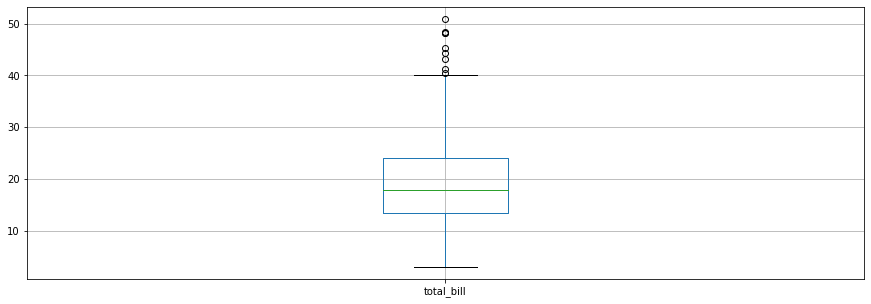

In [5]:
plt.figure(figsize=(15,5)) # 도화지 만들기

tips.boxplot(column = ['total_bill'])

plt.show()
plt.close()

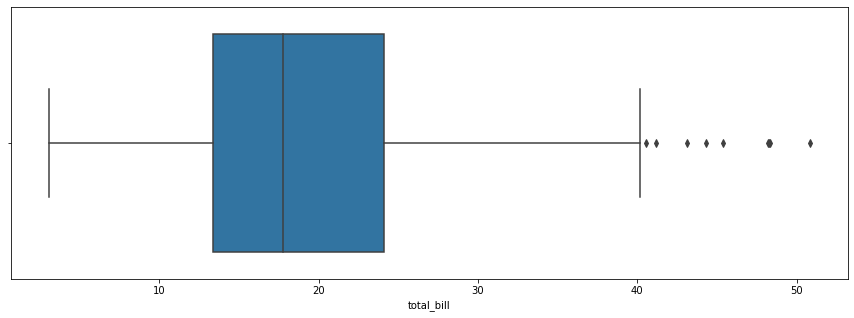

In [7]:
plt.figure(figsize=(15,5)) # 도화지 만들기

sns.boxplot(x = tips['total_bill'])

plt.show()
plt.close()
# Pass the following variable as a keyword arg:
# x. From version 0.12, the only valid positional argument will be 
# `data`, and passing other arguments without an explicit keyword 
# will result in an error or misinterpretation.
#   warnings.warn( x값 지정 안한 오류

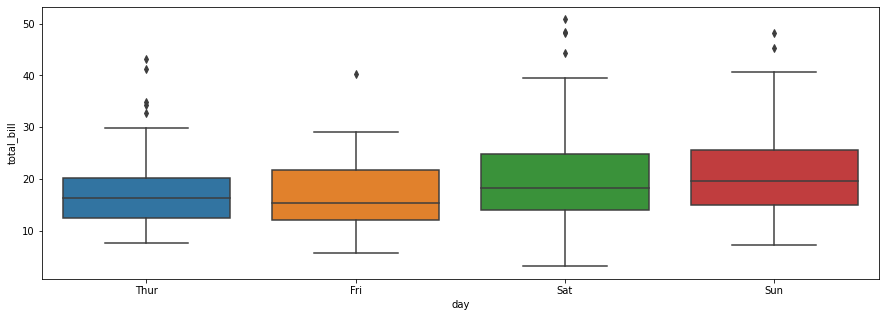

In [8]:
plt.figure(figsize=(15,5)) # 도화지 만들기

sns.boxplot(x = 'day' ,
           y = 'total_bill',
           data = tips)
plt.show()
plt.close()

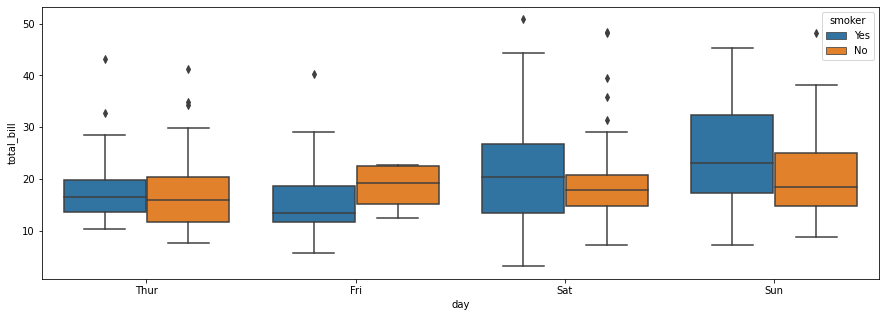

In [9]:
plt.figure(figsize=(15,5)) # 도화지 만들기

sns.boxplot(x = 'day' ,
            y = 'total_bill',
            hue = 'smoker',
           data = tips)
plt.show()
plt.close()

In [504]:
print('1. 이상치 값 제거')
print('2. 이상치 값 변환 -> NaN -> 대체값으로 처리')

1. 이상치 값 제거
2. 이상치 값 변환 -> NaN -> 대체값으로 처리


In [10]:
q1 = tips['tip'].quantile(0.25) #특정 분위수 값 리턴 ex) 1사분위 값
q3 = tips['tip'].quantile(0.75)

# IQR
iqr = 1.5*(q3-q1)
q3

3.5625

In [50]:
tips = sns.load_dataset('tips')

In [68]:
def removeoutlier(frm,column):
    q1 = frm[column].quantile(0.25) #특정 분위수 값 리턴 ex) 1사분위 값
    q3 = frm[column].quantile(0.75)
    
    # IQR
    iqr = 1.5*(q3-q1)
    frm[column][(frm[column] > (q3 + iqr)) | (frm[column] < (q1 - iqr))] = None
    frm
    print(frm)
    return frm
# 왜 이상치가 사라지지 않는가?, 저렇게 쓰는 문법?, 경고가 뜨는 이유?

C:\Users\shhmu\AppData\Local\Temp/ipykernel_17700/4055653596.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frm[column][(frm[column] > (q3 + iqr)) | (frm[column] < (q1 - iqr))] = None


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


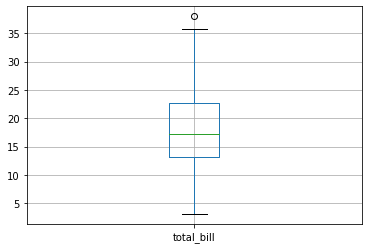

In [69]:
outlier_frm=removeoutlier(tips,'total_bill')
outlier_frm.boxplot(column = 'total_bill')
plt.show()
plt.close()


<AxesSubplot:>

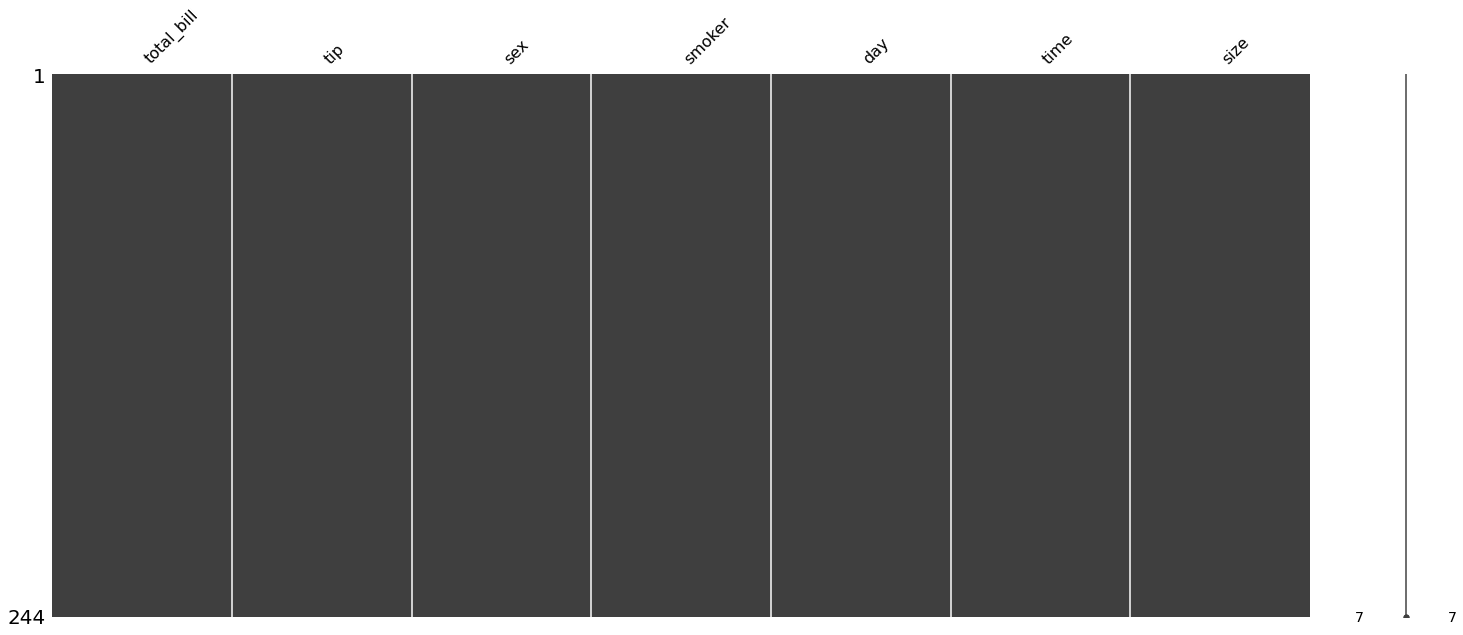

In [33]:
msno.matrix(outlier_frm)

In [36]:
outlier_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [71]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [72]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [74]:
q1 = iris_df['sepal length (cm)'].quantile(0.25) 
q3 = iris_df['sepal length (cm)'].quantile(0.75)
# IQR
iqr = 1.5*(q3-q1)

NameError: name 'titanic' is not defined

In [63]:
iris_df['sepal length (cm)'][(iris_df['sepal length (cm)'] > 5) | (iris_df['sepal length (cm)'] < 3)]= None 

<AxesSubplot:>

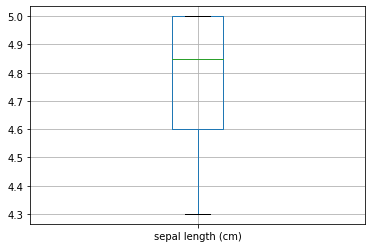

In [65]:
iris_df.boxplot(column ='sepal length (cm)')

In [70]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  32 non-null     float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [47]:
iris_df.loc[0,['sepal length (cm)']] = 0

In [48]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
